# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

В этом модуле мы поговорим об ещё одном направлении разведывательного анализа данных — проектировании признаков (Feature Engineering). Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

>Но мы же уже собрали данные на этапе сбора данных и подготовили данные на этапе очистки… Для чего повторно создавать части в EDA?

Как мы выяснили в предыдущих модулях, бывает недостаточно данных, собранных после этапа формирования проблемы. Данные могут быть представлены в «неподобающем» для обучения виде, например в формате даты или времени, большого текста. 
***
При прогнозировании дефолта клиента банка для создания прогнозной модели очень важно иметь информацию о дате выдачи кредита, плановой и действительной датах погашения. Эти даты дают нам представление о характере погашения кредита: был он выплачен вовремя или раньше срока, с просрочкой. 
***
В отличие от человека, модель машинного обучения не может проанализировать эти даты. А вот информация о просрочке (разница между плановой и фактической датой погашения) представлена в числовом формате и может сообщить некую информацию модели. Число, равное или меньше 0, говорит о клиенте как о благонадёжном заёмщике; число больше нуля характеризует заёмщика как должника. Такое конструирование признаков помогает дата-сайентисту не утратить часть данных, а также представить их в более «выгодном» свете.

В знакомой нам задаче винных обзоров информация о вкусовых качествах вина также может оказаться важной при его оценке, но не может быть передана в модель машинного обучения, так как этот признак — сплошной текст. Однако мы можем вычленить из текста информацию о положительной или отрицательной оценке вина, превратив её в признаки. Такой признак, скорее всего, оказался бы важным в определении качественных вин. Определить его значимость мы сможем только на этапе отбора признаков, который мы также будем изучать в модулях EDA.

Избавляться от перечисленных выше данных было бы неправильно, ведь мы можем лишиться части потенциально важной информации. Проектирование признаков как раз занимается преобразованием такой информации в признаки для будущей модели машинного обучения. 

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

В ЭТОМ МОДУЛЕ ВЫ УЗНАЕТЕ:
- какие этапы включает в себя проектирование признаков;
- что такое внешние источники данных;
- что такое кодирование признаков;
- что такое преобразование признаков;
- что такое отбор признаков.

В ЭТОМ МОДУЛЕ ВЫ НАУЧИТЕСЬ:
- создавать новые признаки;
- использовать внешние источники данных для проектирования признаков;
- кодировать и преобразовывать признаки;
- делать отбор лучших признаков.

# Создание признаков

>Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 

- создание признаков;
- преобразование признаков;
- отбор признаков.

В данном модуле мы подробно познакомимся с каждым из этапов проектирования признаков. Этот юнит будет посвящён процессу создания признаков.

***
Вы уже знакомы с методами создания столбцов в pandas из модуля PYTHON-11. Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame. Советуем повторить этот материал.
***

Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

- с помощью внешних источников данных;
- из существующего набора данных.

>В колл-центрах часто используются системы автоматического подбора номеров для дозвона (рекомендация). Если клиент во время прошлого созвона сбросил трубку, то автоматическая система должна снижать рекомендацию этого номера. Клиент вряд ли ответит после того, как бросил трубку. 

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

>Для определения дефолтности клиента банки делают запрос в БКИ с целью получения дополнительной информации по клиенту. 

***
БКИ - бюро кредитных истории
***

Такая информация о невыплаченных долгах другим организациям может быть решающим фактором в вынесении решения по кредиту. Эту информацию можно получить с использованием внешних источников данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

- разбор категорий; 
- разбор даты и времени;
- разбор числовых признаков;
- разбор текста.

#### РАЗБОР ДАТЫ И ВРЕМЕНИ

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

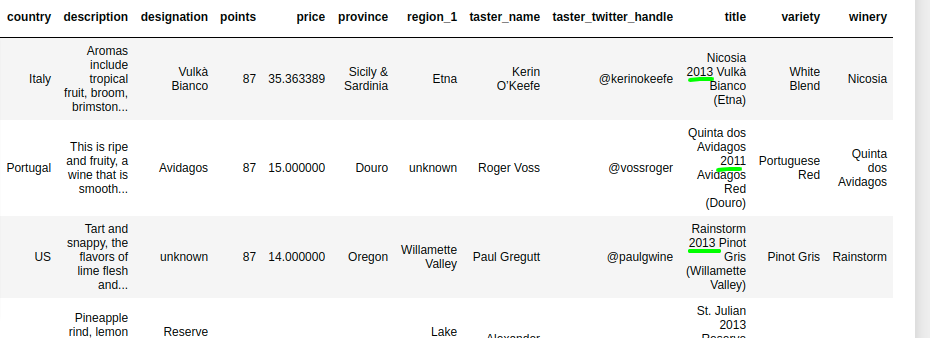

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

#### РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

In [2]:
data = pd.read_csv('data/wine_cleared.zip')

In [3]:
# оздадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.
***
>Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации. 
***

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. 

#### РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

>Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

***
Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.
***

![image.png](attachment:image.png)

                        Демонстрация работы регулярного выражения для поиска email в тексте
                        
Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/).

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом [str.findall()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 



In [4]:
# код для нахождения года вина при помощи регулярного выражения:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

Разберём регулярное выражение \d{4}:

- \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
- {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

***
Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.
***

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

Полученный признак year будет выглядеть следующим образом:
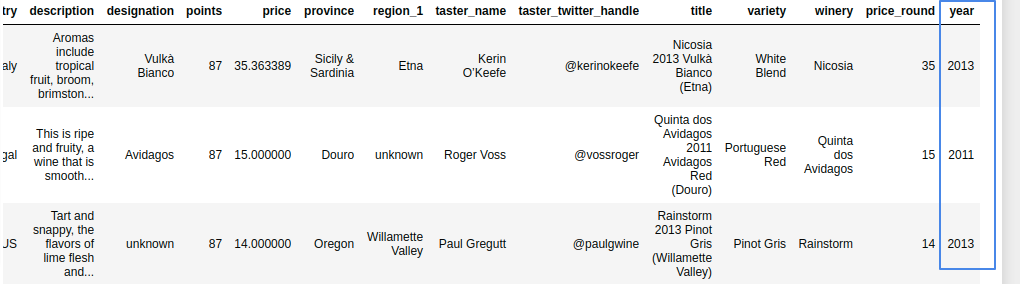

Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

#### РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [5]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [6]:
# В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.
data['country'].value_counts().head(3)

US        54504
France    22093
Italy     19540
Name: country, dtype: int64

In [7]:
# Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.
# В ответ впишите результат выполнения кода data['is_france'].sum():
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [8]:
data['is_france'].sum()
data['is_italy'].sum()

22093

19540

***
Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.
***

Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

In [9]:
# Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
# В ответ впишите результат выполнения кода data['old_wine'].sum():
# Так как у нас есть пропуски, но нам про них ничего не говорили, то при переводе 
# в datatime будем использовать параметр errors - неверный синтаксис будет установлен
# как Nan т.е вернет его
data['year'] = pd.to_datetime(data['year'], errors = 'coerce').dt.year
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)
data['old_wine'].sum()

39765

Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак.

>Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [10]:
# здесь обратным слешем (\) экранируем скобку (, затем () показываем, что внутри будем
# искать выражение \w+ - любую цмфру, букву, вхождение символа, затем закрывающая скобка 
# экранированная
mask = '\((\w+)\)'
data['locality'] = data['title'].str.findall(mask).str.get(0)
data['locality']

0           Etna
1          Douro
2            NaN
3            NaN
4            NaN
           ...  
129966     Mosel
129967    Oregon
129968    Alsace
129969    Alsace
129970    Alsace
Name: locality, Length: 129971, dtype: object

# Создание признаков. Внешние источники данных

>Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

***
Для определения платежеспособности клиента банки часто используют данные из [Федеральной службы государственной статистики](https://rosstat.gov.ru/labor_market_employment_salaries), чтобы получить информацию о занятости клиента, размере оплаты труда для конкретного региона, в котором проживает клиент. Эта информация может оказаться важной в определении платёжеспособности клиента.
***

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

***
Коллекторская компания по договорённости с Федеральной службой судебных приставов дополнительно получает информацию об исполнительных производствах и других судебных процессах по своим клиентам. Это помогает обеспечивать более качественные взыскания.
***

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

***
Например, на сайте [Федеральной службы государственной статистики](https://rosstat.gov.ru/) (Росстат) вы можете [скачать данные](https://showdata.gks.ru/report/278934/) об общем приросте населения областей РФ в формате .XLSX, .CSV, .HTML, .DOCX. Вы уже работали с файлами различных форматов в модуле PYTHON-16. Как выгружать данные из файлов разных форматов.
***

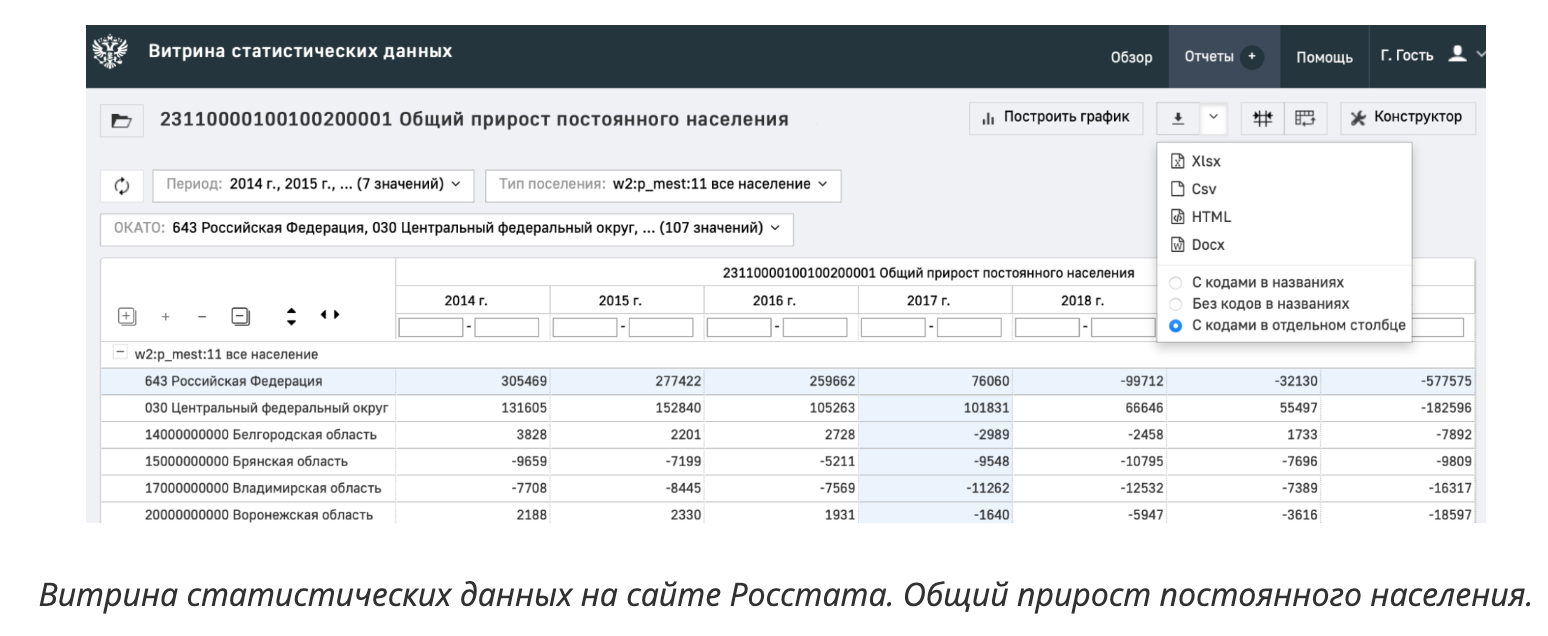

Дата-инженеры могут запрашивать у сотового оператора по API информацию о принадлежности номера телефона определённому клиенту. Такую информация можно использовать, чтобы выяснить, скрывает ли человек своё настоящее имя.

__Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу.__

Например, вы хотите в целях обучения создать модель, которая бы предсказывала стоимость автомобиля по заданным характеристикам. Из данных у вас есть только марка автомобиля и его стоимость. Произведя парсинг сайта [auto.ru](https://auto.ru/), вы сможете получить дополнительную информацию о марках автомобиля: тип кузова, габариты, расход топлива, — и понять, из каких параметров складывается цена на автомобиль.

Внешняя информация бывает общая и профильная.

>Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 

- географические: население страны, площадь страны, столица страны и так далее.
- экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
- статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

>Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить.

Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в [Dadata.ru](https://dadata.ru/) для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

#### РАБОТА С ФАЙЛАМИ

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [11]:
# Дата-инженеры предоставили нам файл с данными о населении по странам.
import pandas as pd
country_population = pd.read_csv('data/country_population.zip', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [12]:
# Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


>Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [13]:
# В результате объединения получаем информацию о населении страны в каждой строке:
data = data.join(country_population.set_index('country'), on='country')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000"


In [14]:
# используем файл с информацией о площади страны.
country_area = pd.read_csv('data/country_area.zip', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [15]:
# Создайте новый признак area_country — площадь страны, аналогичный признаку population.
data = data.join(country_area.set_index('country'), on='country')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285",357022.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000",547030.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000",547030.0


In [16]:
# Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve 
# Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'].area

94    9372610.0
Name: area, dtype: float64

>Итак, мы получили два новых признака, используя общую внешнюю информацию и навыки выгрузки данных и файлов различных форматов. Более профессиональные методы, например парсинг, вы будете использовать в практических проектах, чтобы получить профильную внешнюю информацию.

Внешней информации можно получить очень много. Руководствуйтесь следующими правилами при работе с внешними источниками данных:

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

4. Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 

5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

# Создание признаков. Работа с форматом «дата-время»

Очень часто при сборе данных для предсказательных моделей появляются признаки, выраженные датой и временем. С датой и временем вы работали в модуле PYTHON-11. Базовые приёмы работы с данными в Pandas Юнит 3. Работа с датами в DataFrame.

>В рекомендательных сервисах интернет-магазинов, которые тоже используют машинное обучение, очень важно знать, когда клиент сделал последний заказ, когда клиент последний раз заходил на сайт, когда последний раз просматривал ту или иную категорию товаров на сайте. На основе этой информации модель определяет, какой товар лучше всего рекомендовать при следующем посещении сайта. Эта информация хранится в базе данных в формате даты, например строкой вида 2000-09-13 13:59:00. Признак в таком формате не может быть передан на вход модели машинного обучения.

***

>Большинство алгоритмов машинного обучения не умеют работать с признаками в строковом представлении, поэтому такие признаки должны быть преобразованы в формат числа. Подробнее с алгоритмами машинного обучения вы познакомитесь далее в модулях про машинное обучение.

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. 

>Например, дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт, то есть результат разницы между текущей датой и датой последнего захода на сайт:

текущая дата - дата с последнего захода на сайт = количество дней с момента последнего посещения сайта 

Также мы можем посчитать количество минут, секунд, месяцев, лет с момента какой-либо даты. Это зависит от контекста:

- минуты и секунды актуальны для событий, часто меняющихся во времени;
- месяцы и года — для событий, которые происходят реже. Например, вычисление возраста из даты (лет), подсчёт стажа на последнем месте работы (месяцев, лет).

Помимо разницы в датах вы можете подмечать, в какое время суток произошло некое событие: день, вечер, ночь. 

Также вы можете выделять из даты месяц или время года некоего события. Так вы сможете выяснить, например, влияет ли время года на покупку бытовой техники на сайте компании.

***
Создавая новые признаки из строковых признаков, мы также можем получить признаки в строковом представлении как в случае со временем суток. Такой признак мы по-прежнему не можем передать в модель. Но можно передать его в виде: 1 — утро, 2 — день, 3 — вечер, 4 — ночь. Этот приём часто используется дата-сайентистами для оцифровки некоторых категорий и называется кодированием. С кодированием признаков мы познакомимся в следующем юните.
***

Мы рассмотрели самые популярные идеи для создания признаков из даты, но вы можете придумать гораздо больше вариантов, так как генерация признаков — это очень творческий процесс, ограниченный только фантазией и временем автора.


Давайте рассмотрим, из каких признаков состоит срез данных:

- client_id — идентификатор клиента в базе;
- agent_date — время соединения с агентом;
- created_at — время соединения с клиентом (начало разговора);
- end_date — время окончания соединения с клиентом (конец разговора).

In [17]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Все признаки в наборе данных, за исключением номера клиента, представляют собой дату и время. Давайте создадим несколько признаков из этих данных.

Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 

Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [18]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Таким образом мы получили новый признак duration — длительность разговора в секундах.

Давайте создадим ещё несколько признаков на основе существующих.

In [19]:
# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. 
# Результат запишите в новый признак time_connection.
# В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

Факт дозвона очень важен для компании, ведь если до клиента не удалось дозвониться, необходимо звонить ещё. 

In [20]:
# Создайте новый признак is_connection — факт соединения с клиентом. 
# Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
# В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x >= 10 else 0)
calls['is_connection'].sum()

7

In [21]:
# Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
# В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [22]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

Итоговый набор данных включает в себя колонки client_id, duration, time_connection, is_connection, time_diff. После генерации признаков специалисты по машинному обучению проводят отбор признаков. Этому вы научитесь далее в юните про отбор признаков.

Таким образом, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных. 

***

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [23]:
# Так как у нас после предудушего преобразвоания дата  представленна в виде года во float
type(data['year'][0])
# Мы преобразуем float to datatime 
pd.to_datetime(data['year'], format='%Y').min()
# Преобразуем указанную дату в формат дататайм
time_now = pd.to_datetime('2022-01-12', format='%Y-%m-%d')
time_now
# Делаем вычисления и вытаскиваем атрибут дней, так как иначе у нас будет deltatime
data['years_diff'] = (time_now - pd.to_datetime(data['year'], format='%Y')
                                                                    ).dt.days
data['years_diff'].max()

numpy.float64

Timestamp('1752-01-01 00:00:00')

Timestamp('2022-01-12 00:00:00')

98627.0

# Кодирование признаков. Методы

***
Ещё одним важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 
***

>Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется кодированием признаков.

Для лучшего усвоения материала предлагаем вам повторить типы категориальных признаков в ранее пройденном модуле PYTHON-11. Базовые приемы работы с данными в Pandas Юнит 5. Тип данных Category.

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

![image.png](attachment:image.png)

                                        Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте порядковое кодирование (Ordinal Encoding). 

***
Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).
***

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку [category_encoders](https://contrib.scikit-learn.org/category_encoders/). Это удобная библиотека для кодирования категориальных переменных различными методами.

Установим библиотеку:
- pip install category_encoders

Рассмотрим следующие популярные способы кодирования: 

- порядковое кодирование (Ordinal Encoding); 
- однократное кодирование (OneHot Encoding); 
- бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [24]:
# Импортируем библиотеку category-encoders для дальнейшего использования. 
import category_encoders as ce

In [25]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing
# size - порядковый признак

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


# ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

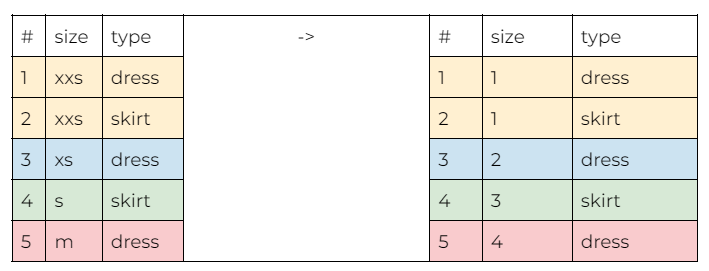

Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе [OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html). По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод [concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) для добавления закодированного признака в датафрейм data.

In [26]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
                                        'col': 'size',
                                        'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                                                    'm': 4, 'l': 5, 'xxl': 6}
                                        }])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

>Однако порядковое кодирование плохо работает для номинальных признаков. Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

***
Мы решили узнать, влияет ли знак зодиака на успешное продвижение по службе. Мы собрали данные добровольцев и пытаемся спроектировать признаки для дальнейшей предсказательной модели. Признак знак зодиака мы не можем в изначальном виде передать в модель, так как он строковый. Признак зодиака является номинальным. Закодируем его при помощи порядкового кодирования: 

1 — овен

2 — телец

3 — близнецы

4 — рак

…

12 — рыбы
***

Мы получим признак в числовом представлении, и модель машинного обучения будет воспринимать знак зодиака как числовой признак. Ошибочен ли вывод, что чем больше числовой код знака зодиака, тем лучше (или наоборот хуже), как это было бы в порядковом признаке? Да, так как эти категории независимы. Ошибки мы не получим, однако для номинальных признаков существует более эффективные типы кодирования, которые мы рассмотрим позже.

В случае с магазином одежды для размера одежды size уместно применить порядковое кодирование. Кодирование размера xxs, xs, s в 1, 2, 3 будет соответствовать логическому увеличению порядка.

А для номинального признака type необходимо подобрать другое кодирование. Мы сделаем это далее в юните при знакомстве с OneHot-кодированием.

### Задание теоритическое

Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием - но годы у нас числовые поэтмоу мы не сможем этого сделать, но проделаем шаги для того чтобы было понятно что делать напримере стран.

In [27]:
data.describe(include='all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff
count,129972.000000,129909,129972,129972,129972.000000,129972.000000,129909,129972,129972,129972,129972,129971,129972,129972.000000,125332.000000,129972.000000,129972.000000,129972.000000,129972.000000,52930,129823,1.298350e+05,125332.000000
unique,NaN,43,119955,37980,NaN,NaN,425,1230,20,16,118840,707,16757,NaN,NaN,NaN,NaN,NaN,NaN,597,42,NaN,NaN
top,NaN,US,"Gravenstein apple, honeysuckle and jasmine aro...",unknown,NaN,NaN,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,NaN,NaN,NaN,NaN,NaN,NaN,WA,"333,022,386",NaN,NaN
freq,NaN,54504,3,37465,NaN,NaN,36247,21248,26244,31213,11,13272,222,NaN,NaN,NaN,NaN,NaN,NaN,5276,54504,NaN,NaN
mean,64985.346259,NaN,NaN,NaN,88.447142,35.363256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.338104,2010.509814,0.419352,0.169983,0.150340,0.305958,NaN,NaN,4.398653e+06,4207.908347
std,37519.603583,NaN,NaN,NaN,3.039719,39.576943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.577050,6.230421,0.493455,0.375619,0.357406,0.460814,NaN,NaN,4.377311e+06,2275.633756
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1752.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.586000e+03,1837.000000
25%,32492.750000,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.570220e+05,3298.000000
50%,64985.500000,NaN,NaN,NaN,88.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,7.569500e+05,4029.000000
75%,97478.250000,NaN,NaN,NaN,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,2013.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,9.372610e+06,4759.000000


In [28]:
# Используйте ранее изученные методы кодирования и закодируйте признак year в датасете 
# винных обзоров порядковым кодированием.
# Узнаем страны для кодировки и сделаем из них список
countrys = list(data['country'].value_counts().index)
countrys = sorted(countrys)
countrys

['Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Lebanon',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Morocco',
 'New Zealand',
 'Peru',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Switzerland',
 'Turkey',
 'US',
 'Ukraine',
 'Uruguay']

In [29]:
# Создаем словарь чтобы потом применить его - можно сделать через цикл
dct = {}
for i, n in enumerate(countrys):
    dct[n] = i + 1
# Либо через генератор словаря
result_dict = {value: index + 1 for index, value in enumerate(countrys)}

In [30]:
result_dict

{'Argentina': 1,
 'Armenia': 2,
 'Australia': 3,
 'Austria': 4,
 'Bosnia and Herzegovina': 5,
 'Brazil': 6,
 'Bulgaria': 7,
 'Canada': 8,
 'Chile': 9,
 'China': 10,
 'Croatia': 11,
 'Cyprus': 12,
 'Czech Republic': 13,
 'Egypt': 14,
 'England': 15,
 'France': 16,
 'Georgia': 17,
 'Germany': 18,
 'Greece': 19,
 'Hungary': 20,
 'India': 21,
 'Israel': 22,
 'Italy': 23,
 'Lebanon': 24,
 'Luxembourg': 25,
 'Macedonia': 26,
 'Mexico': 27,
 'Moldova': 28,
 'Morocco': 29,
 'New Zealand': 30,
 'Peru': 31,
 'Portugal': 32,
 'Romania': 33,
 'Serbia': 34,
 'Slovakia': 35,
 'Slovenia': 36,
 'South Africa': 37,
 'Spain': 38,
 'Switzerland': 39,
 'Turkey': 40,
 'US': 41,
 'Ukraine': 42,
 'Uruguay': 43}

In [31]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encod = ce.OrdinalEncoder(mapping=[{'col':'country',
                                        'mapping':result_dict}])
# применяем трансформацию к столбцу
data_cntr = ord_encod.fit_transform(data['country'])
# смотрим результат
data_cntr
# добавляем результат к исходному DataFrame
#data = pd.concat([data, data_cntr], axis=1)
#data

,country
0,23.0
1,32.0
2,41.0
3,41.0
4,41.0
...,...
129966,18.0
129967,41.0
129968,16.0
129969,16.0


# ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

![image.png](attachment:image.png)

                                        Кодирование колонки color
                                        
На рисунке изображено кодирование колонки color со значениями red, green, blue. Для каждого значения создаётся новый бинарный признак: red -> color_red, blue -> color_blue, green -> color_green, и проставляются значения исходного признака. 

>Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

В нашем примере с признаком color мы получили три новых признака color_red color_blue, color_green. Но представьте, что в наборе данных у нас попадётся признак с большим количеством категорий.

***
Компания, выпускающая аромасвечи, решила узнать, влияет ли регион клиента на выбор их продукции. Признак регион является номинальным, и по правилам блок-схемы мы должны закодировать его однократным кодированием. Таким образом, кодирование признака регион даст нам 84 дополнительных признака для модели. Это может привести к серьёзным проблемам с памятью на наборах с большим количеством строк. 
***

Вернёмся к датасету clothing. Закодируем признак type однократным кодированием. Результат кодирования будет выглядеть так: 

![image-2.png](attachment:image-2.png)

Закодируем признак type в Python. Используем класс [OneHotEncoding](https://contrib.scikit-learn.org/category_encoders/onehot.html) библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [32]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий coat, dress, shirt, skirt. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

***
На самом деле метод однократного кодирования реализован в pandas в функции [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

- clothing_dummies = pd.get_dummies(clothing, columns=['type'])

Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.  
***

In [33]:
# В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name),
# является номинальным. Закодируйте его, используя One-Hot Encoding.
# В ответе напишите, сколько признаков добавилось после применения кодирования.
# Кодируем через OneHotEncoder 
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)
data

# Кодируем через pd.get_dummies() ! при этом методе оригинальный столбец (параметр) удаляеться
data_dummies = pd.get_dummies(data, columns=['taster_name'])
data_dummies

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,taster_name_Kerin O’Keefe,taster_name_Roger Voss,taster_name_Paul Gregutt,taster_name_Alexander Peartree,taster_name_Michael Schachner,taster_name_Anna Lee C. Iijima,taster_name_Virginie Boone,taster_name_Matt Kettmann,taster_name_unknown,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386",9372610.0,3664.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285",357022.0,3298.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,taster_name_Kerin O’Keefe,taster_name_Roger Voss,taster_name_Paul Gregutt,...,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,taster_name_Alexander Peartree,taster_name_Anna Lee C. Iijima,taster_name_Anne Krebiehl MW,taster_name_Carrie Dykes,taster_name_Christina Pickard,taster_name_Fiona Adams,taster_name_Jeff Jenssen,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Kerin O’Keefe,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386",9372610.0,3664.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285",357022.0,3298.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
# В ответе напишите, сколько признаков добавилось после применения кодирования
data['taster_name'].nunique()

20

# ДВОИЧНОЕ КОДИРОВАНИЕ

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.

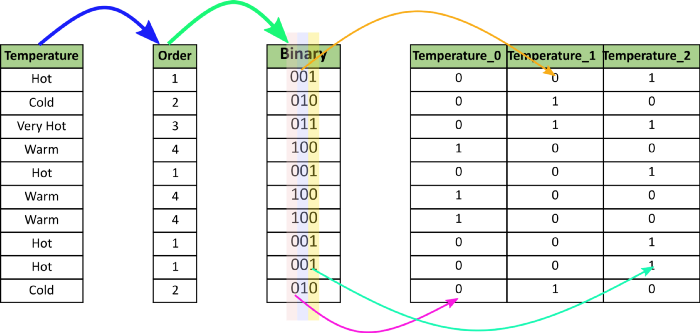

1. Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

2. Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

3. Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

***
Пошаговый алгоритм двоичного кодирования можно описать так: 

- значения признака кодируются в некоторый числовой порядок;
- целые числа кодируются в двоичный код;
- цифры двоичного представления формируют новые столбцы.
***

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс [BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html) библиотеки category_encoders.

In [35]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
# Результатом кодирования будет три новых признака: type_0, type_1, typе_2: 
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [36]:
# Закодируйте признак country двоичным способом.
# Сколько новых признаков образовалось после кодирования признака country?
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)
# У нас 6 новых признаков country_0, country_1, country_2, country_3, country_4, 
# country_5
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,taster_name_Kerin O’Keefe,taster_name_Roger Voss,taster_name_Paul Gregutt,taster_name_Alexander Peartree,taster_name_Michael Schachner,taster_name_Anna Lee C. Iijima,taster_name_Virginie Boone,taster_name_Matt Kettmann,taster_name_unknown,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386",9372610.0,3664.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285",357022.0,3298.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


***
Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью. О том, почему из-за этого может возникнуть проблема, вы узнаете подробнее в модулях про машинное обучение. 
***

В случаях проблем с памятью необходимо обратиться к другим кодировщикам — к порядковому, бинарному кодировщику или иным.

***
Методы, рассмотренные в модуле, популярны и очень часто используются в кодировании данных за счёт своей простоты, понятности и лёгкости в реализации. Про другие, менее популярные способы кодирования вы можете прочитать в документации к используемой нами библиотеке [category_encoders]().
***

Способы кодирования

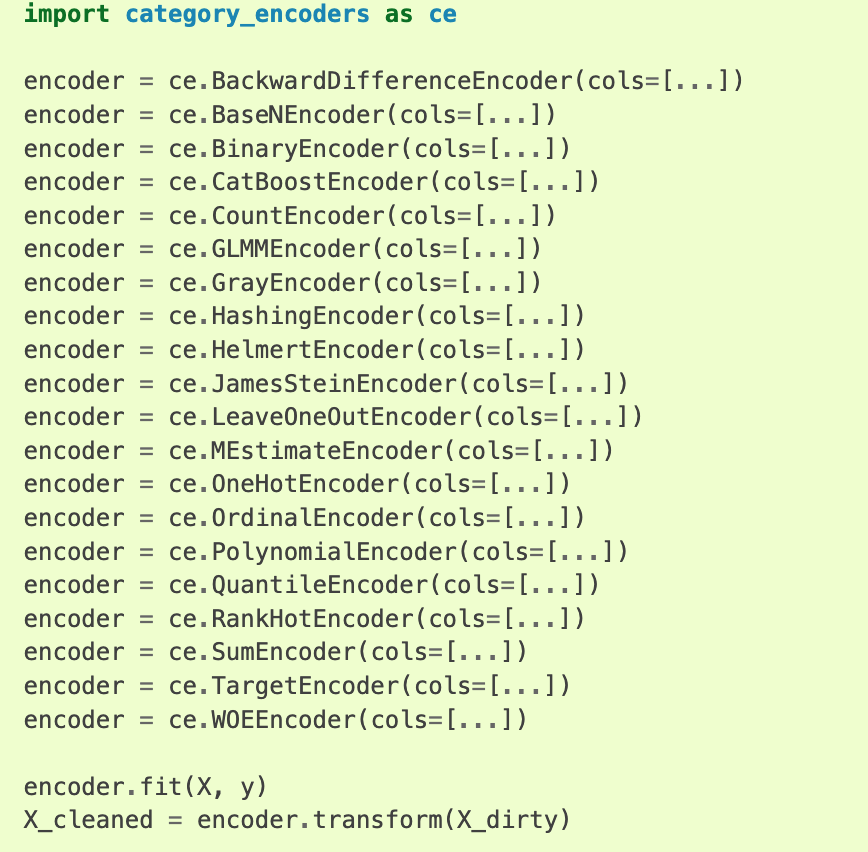

Выбор подходящего метода кодирования может быть непростой задачей при проектировании признаков. Поэтому всегда необходимо тестировать несколько способов кодирования и выбирать тот, с помощью которого получается качественная предсказательная модель. О том, как измерить качество модели, вы узнаете далее в курсе в модулях про машинное обучение.

***

Какой способ кодирования следует выбрать при большом количестве уникальных значений для номинального признака?
- БИНАРНЫЙ

In [37]:
# На основе изученного материала определите подходящий способ кодирования признака
# taster_twitter_handle из датасета винных обзоров и закодируйте его.
# В ответе напишите, сколько признаков добавилось после применения кодирования.
# Посмотрим признак
data['taster_twitter_handle'].nunique()
data['taster_twitter_handle'].sample(5)
# Признак у нас номинальный и имеет больше 15 вариантов, то следуя схеме кодирования
# см. выше - применим бинарное кодирование

16

46288      @vossroger
21414         unknown
66030      @vossroger
89003     @AnneInVino
110849    @wineschach
Name: taster_twitter_handle, dtype: object

In [38]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)
data
# У нас появилось 5 новых признаков - taster_twitter_handle_0, 
# taster_twitter_handle_1, taster_twitter_handle_2, taster_twitter_handle_3, 
# taster_twitter_handle_4

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,taster_name_Kerin O’Keefe,taster_name_Roger Voss,...,taster_name_Virginie Boone,taster_name_Matt Kettmann,taster_name_unknown,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,country_0,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0,3298.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386",9372610.0,3664.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285",357022.0,3298.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [73]:
data.drop(['taster_name_Anne Krebiehl MW'])

KeyError: "['taster_name_Anne Krebiehl MW'] not found in axis"

In [69]:
data = data.drop(['taster_name_Anne Krebiehl MW'], axis=1)

KeyError: "['taster_name_Anne Krebiehl MW'] not found in axis"

In [39]:
# Используйте следующий датафрейм для задания:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
# Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [40]:
# Здесь нуждаються в кодирование признаки product и payment_type - они номинальные
# их меньше 15 - OneHot Encoding
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [41]:
# Кодируем через pd.get_dummies() ! при этом методе оригинальный столбец (параметр) удаляеться
data_dummies = pd.get_dummies(df, columns=['product', 'payment_type'])
data_dummies

,price,product_Product1,product_Product2,product_Product3,payment_type_Amex,payment_type_Mastercard,payment_type_Visa
0,1200,1,0,0,0,1,0
1,3600,0,1,0,0,0,1
2,7500,0,0,1,1,0,0


В этом юните мы изучили основные способы кодирования категориальных переменных и их различия. В следующем юните мы рассмотрим способы преобразования признаков.

# Преобразование признаков. Нормализация. Стандартизация

>Проектирование признаков подразумевает под собой изменение данных, их удаление, создание и тд. В этом юните мы изучим основы преобразования признаков и реализацию этих методов в Python.

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это нормализация и стандартизация, которые мы рассмотрим в этом юните.

>Примечание. Операции нормализации и стандартизации также часто называют шкалированием. 

***
>__Проблема__     
Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. Например, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, например, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше 10, тогда как доход измеряется тысячами.
***

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата. 

Таким образом, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

Рассмотрим такие преобразования, как нормализация и стандартизация.

#### НОРМАЛИЗАЦИЯ

>Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

На обучающем примере применим различные способы нормализации к распределениям и увидем разницу между ними.

Используем библиотеку numpy для создания массивов случайных чисел различных распределений.

In [42]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

- Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
- Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
- Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в [руководстве](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

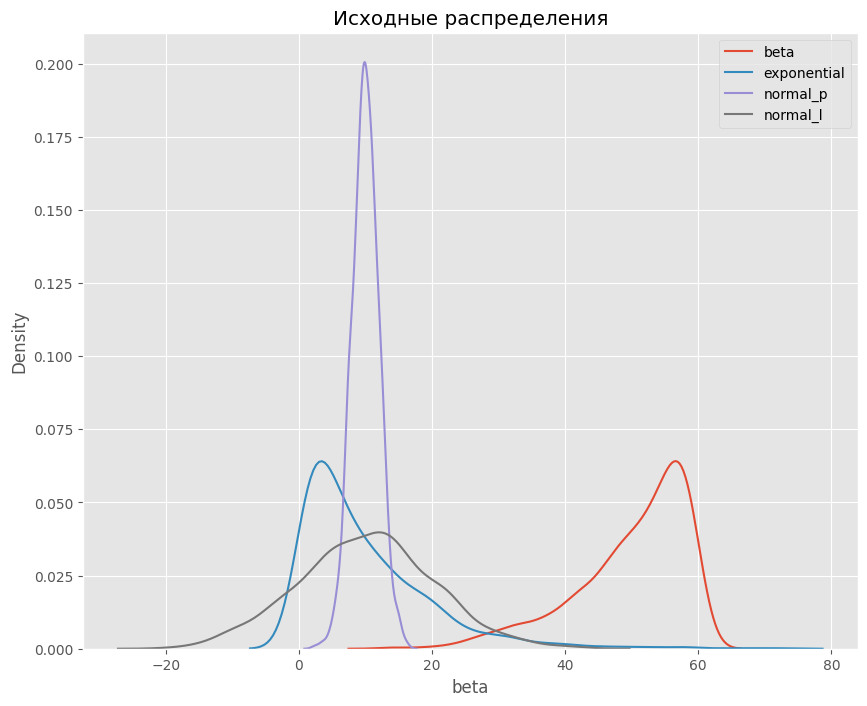

In [43]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

In [44]:
# Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные 
# величины. Попробуем нормализовать их.
# Зафиксируем описательные статистики до преобразований.
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Для нормализации данных мы будем использовать уже знакомую нам библиотеку sklearn.

__MINMAXSCALER__

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

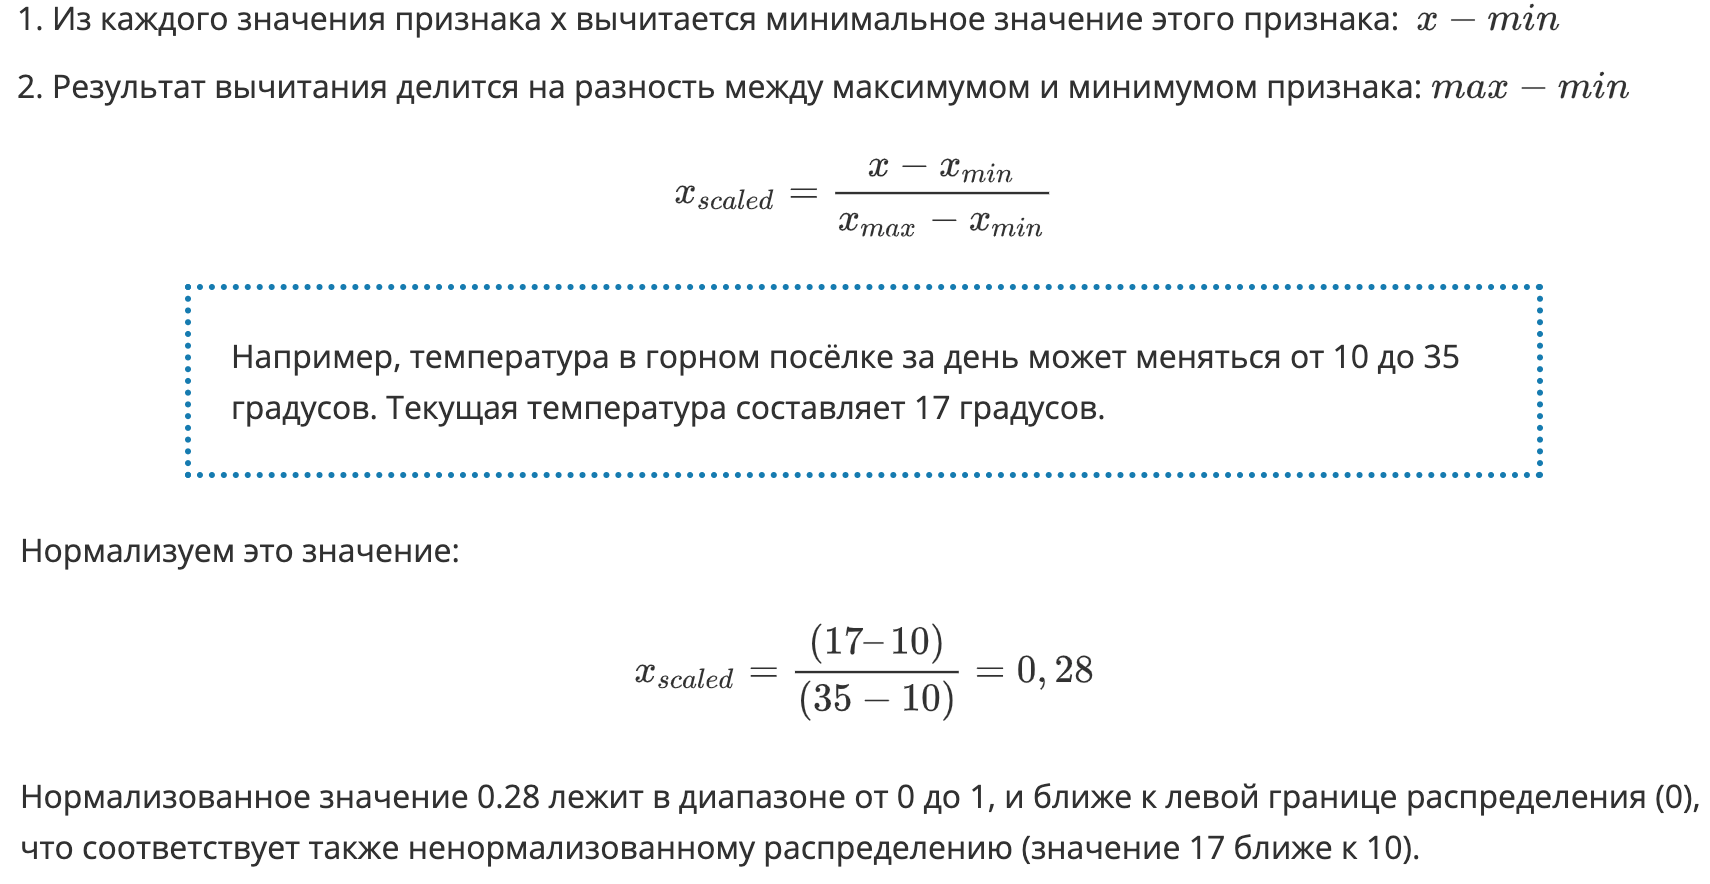

Класс [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

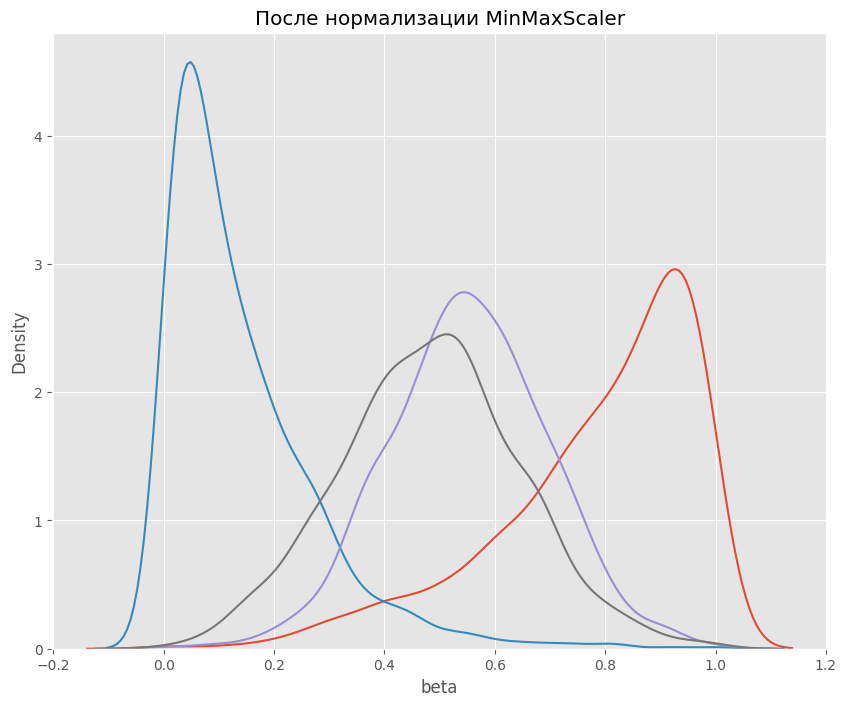

In [45]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1);

In [46]:
# А так — описательные статистики:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

***

Теперь рассмотрим нормализацию методом RobustScaler, а затем сравним их.

__ROBUSTSCALER__

Нормализация методом RobustScaler происходит в несколько этапов:

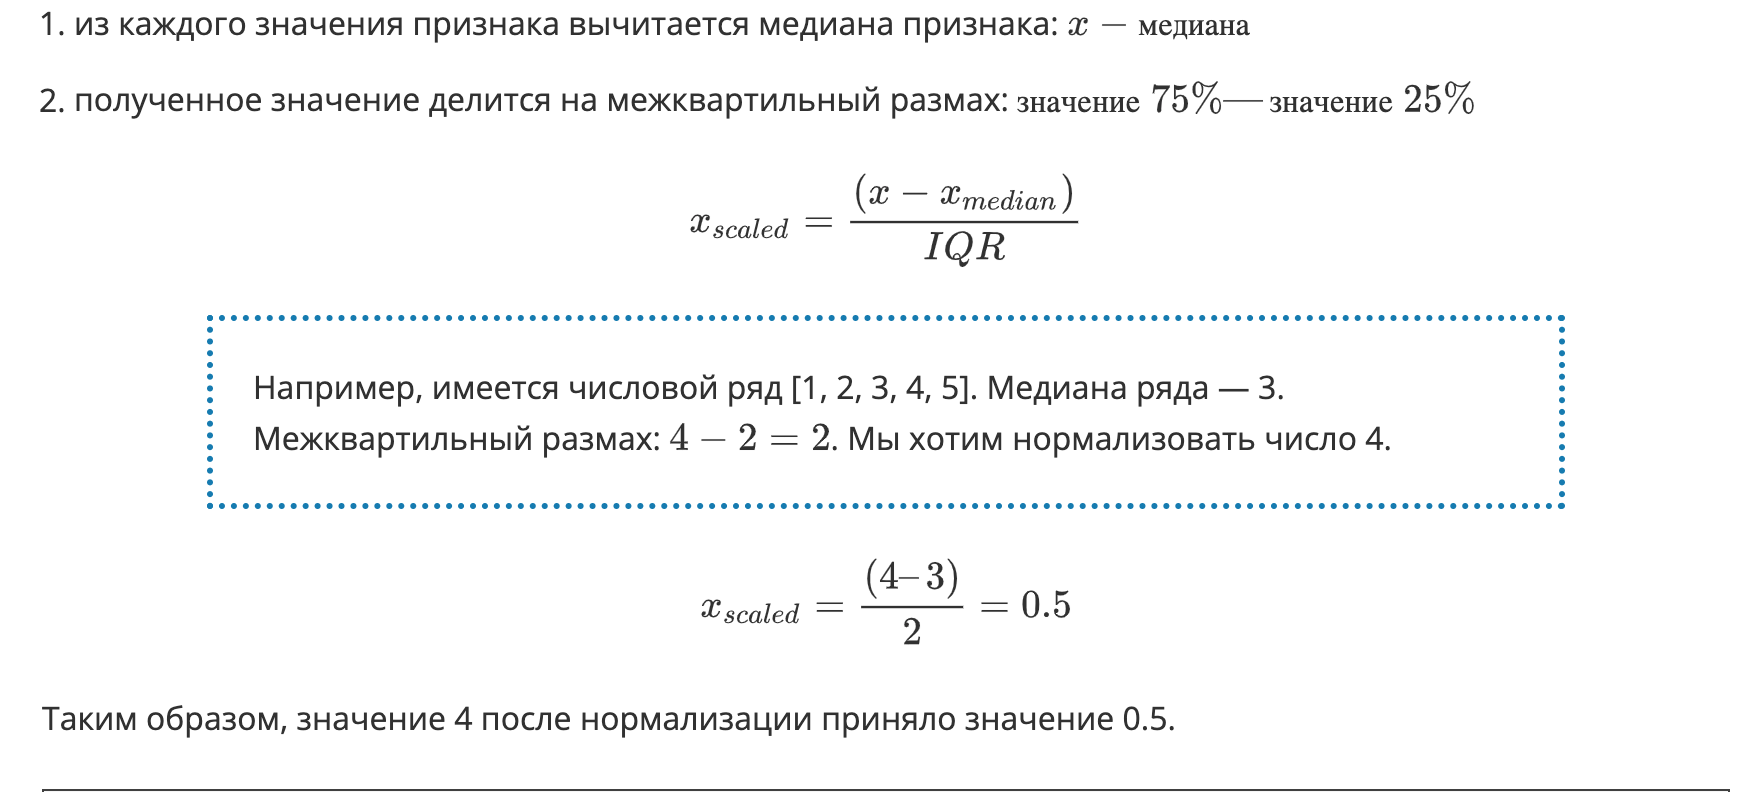

Проведём нормализацию распределений признаков из обучающего примера, используя класс [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).

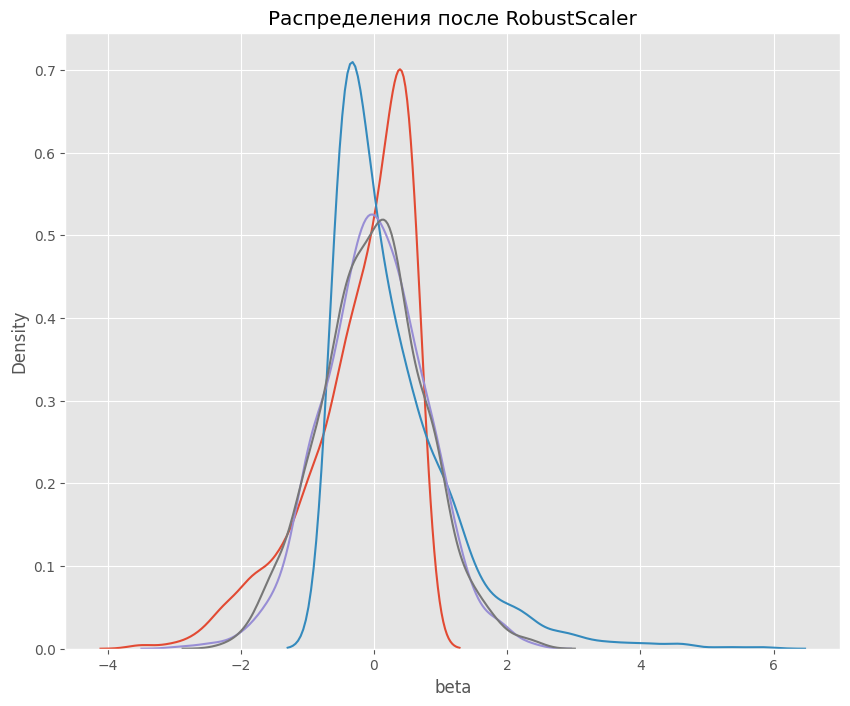

In [47]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1);

In [48]:
# Описательные статистики после нормализации:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


In [49]:
df_r

,beta,exponential,normal_p,normal_l
0,-1.195340,-0.429469,0.716470,-0.427500
1,0.246401,0.550085,0.692166,0.048500
2,-0.448610,-0.334796,0.444160,-0.491032
3,-0.838507,0.961582,-0.655412,2.433017
4,-0.609033,-0.443391,-1.859376,0.508447
...,...,...,...,...
995,-0.124525,-0.295336,-1.117035,-0.054943
996,-0.553334,-0.525971,-0.597076,0.356103
997,0.601572,-0.000334,0.594874,1.787874
998,-0.013897,-0.417975,0.701073,-0.324558


Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

__В ЧЁМ РАЗНИЦА?__

>Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

>RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

***
Больше о других способах нормализации и их сравнении вы можете прочитать в официальном [руководстве scikit-learn](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).
***

__СТАНДАРТИЗАЦИЯ__

>Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

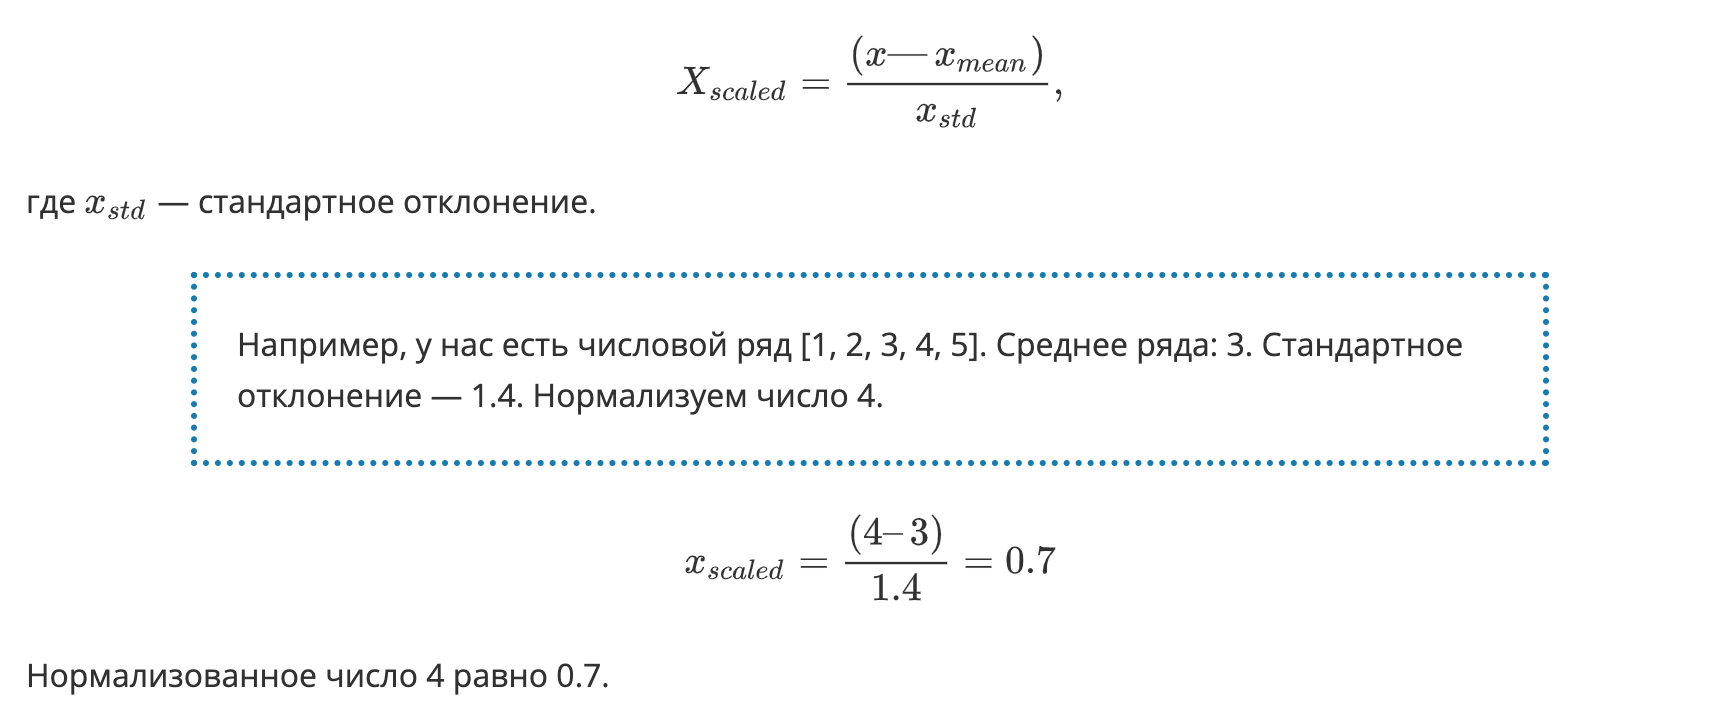

>Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

__ДЛЯ ЧЕГО НЕОБХОДИМО ТАКОЕ ПРЕОБРАЗОВАНИЕ?__

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

>Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.

__STANDARDSCALER__

Для стандартизации используем класс [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

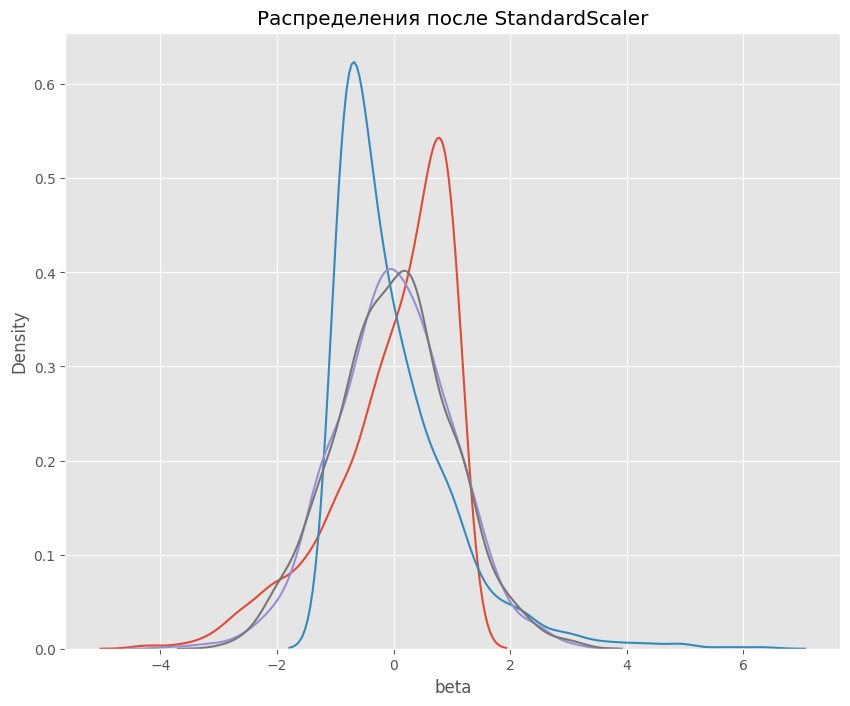

In [50]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1);

In [51]:
# Описательные статистики после нормализации:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

__НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ ?__

Так как нормализация и стандартизация преследуют одни и те же цели, возникают вопросы:

- Когда признаки необходимо нормализовать, а когда стандартизировать? Какой способ нормализации выбрать? 

Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных — заранее невозможно узнать, какое преобразования будет лучше. 

Однако мы составили небольшую инструкцию по преобразованию признаков:

- если признак распределён нормально, то его необходимо стандартизировать;
- если признак распределён ненормально, его необходимо нормализовать;
- если разброс значений небольшой, то можно обойтись без преобразования данных.

Выбор определённого способа преобразования и его необходимости может быть нелёгкой задачей, поэтому пробуйте делать различные преобразования и оценивайте результаты на конкретной модели, смотрите, есть ли разница в улучшении качества модели. О том, как сравнивать модели, вы узнаете далее в курсе в модулях про машинное обучение.

- Что лучше? Нормализовать, а потом стандартизировать или наоборот?

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.
***

Преобразование признаков — это…
- процесс, направленный на масштабирование и изменение распределения в данных

>После нормализации данных значения становятся распределены в диапазоне 0-1 или в другом заданном диапазоне. Это преобразование может улучшить результаты модели. Нормализация не приводит стандартное отклонение к 1, это делает стандартизация.

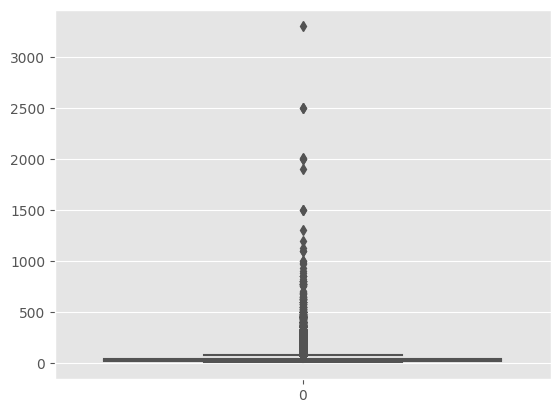

In [52]:
# Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт,
# что в данных присутствуют вина с выбросной стоимостью.
# В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.
# посмотрим как распределен признак
sns.boxplot(data['price']);

In [53]:
# так как признак распределен с выбросами, то воспользуемся RobustScaler
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
df_r = r_scaler.fit_transform(data[['price']])
df_r.sum().round()

43501.0

In [54]:
# Стандартизируйте исходный признак price.
# В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()
# кодируем исходный датасет
df_s = s_scaler.fit_transform(data[['price']])
# так как у нас съехал индекс из за странного задвоения строки 109989, то 129968 + 1
df_s[129969].round(2)

array([-0.14])

In [55]:
# так как у нас съехал индекс из за странного задвоения строки 109989, то 
data.index.value_counts()

109989    2
0         1
86642     1
86655     1
86654     1
         ..
43319     1
43318     1
43317     1
43316     1
129970    1
Length: 129971, dtype: int64

В этом юните мы рассмотрели основные преобразования в данных и научились применять их к признакам в наборе данных. В следующем юните вы узнаете про отбор признаков и мультиколлинеарность.

# Отбор признаков. Мультиколлинеарность

Ещё одним важным этапом в жизненном цикле машинного обучения и в проектировании признаков является отбор признаков.

>Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

Например, если бы мы делали отбор признаков для задачи сомелье винных обзоров, мы бы отобрали те признаки, что больше всего влияют на рейтинг вина.

__ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ?__

Отбор признаков помогает:

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

__КАК ПОНЯТЬ, КАКИЕ ПРИЗНАКИ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ПРЕДСКАЗАНИЕ?__

Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как значимость, критерий значимости, гипотеза. С этими понятиями вы познакомитесь в следующем модуле про выдвижение гипотез. 

Однако есть и ещё один способ отобрать признаки для обучения — корреляция, которую вы изучили в модуле EDA-2. Математическая статистика в контексте EDA Юнит 3. Корреляция.

В этом юните мы рассмотрим такое понятие, как мультиколлинеарность и её связь с отбором признаков.

>Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

>Некоторые модели плохо работают на данных с мультиколлинеарностью. Вы узнаете об этом позже в модулях про машинное обучение.

Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

***
На основании набора данных об Ирисах требуется построить модель, определяющую вид растения по данным измерений. 

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- sepal length — длина наружной доли околоцветника;
- sepal width — ширина наружной доли околоцветника;
- petal length — длина внутренней доли околоцветника;
- petal width — ширина внутренней доли околоцветника.

In [56]:
# Прочитаем датасет и посмотрим на первые несколько строк.
import pandas as pd
iris = pd.read_csv('data/iris.zip')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

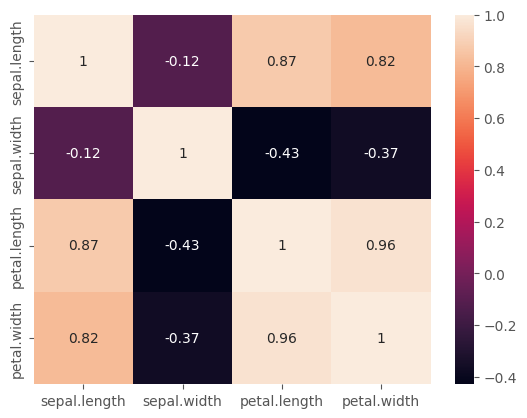

In [57]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True);

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).
***

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [58]:
iris = iris.drop(['petal.width'], axis=1)

In [59]:
# Однако второй признак petal.length из этой пары также сильно коррелирует с признаком
# sepal.length. Удалим и его:
iris = iris.drop(['petal.length'], axis=1)

In [60]:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.
***
Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.
***
Таким образом, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

__КАКОЙ ПРИЗНАК УДАЛЯТЬ?__

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

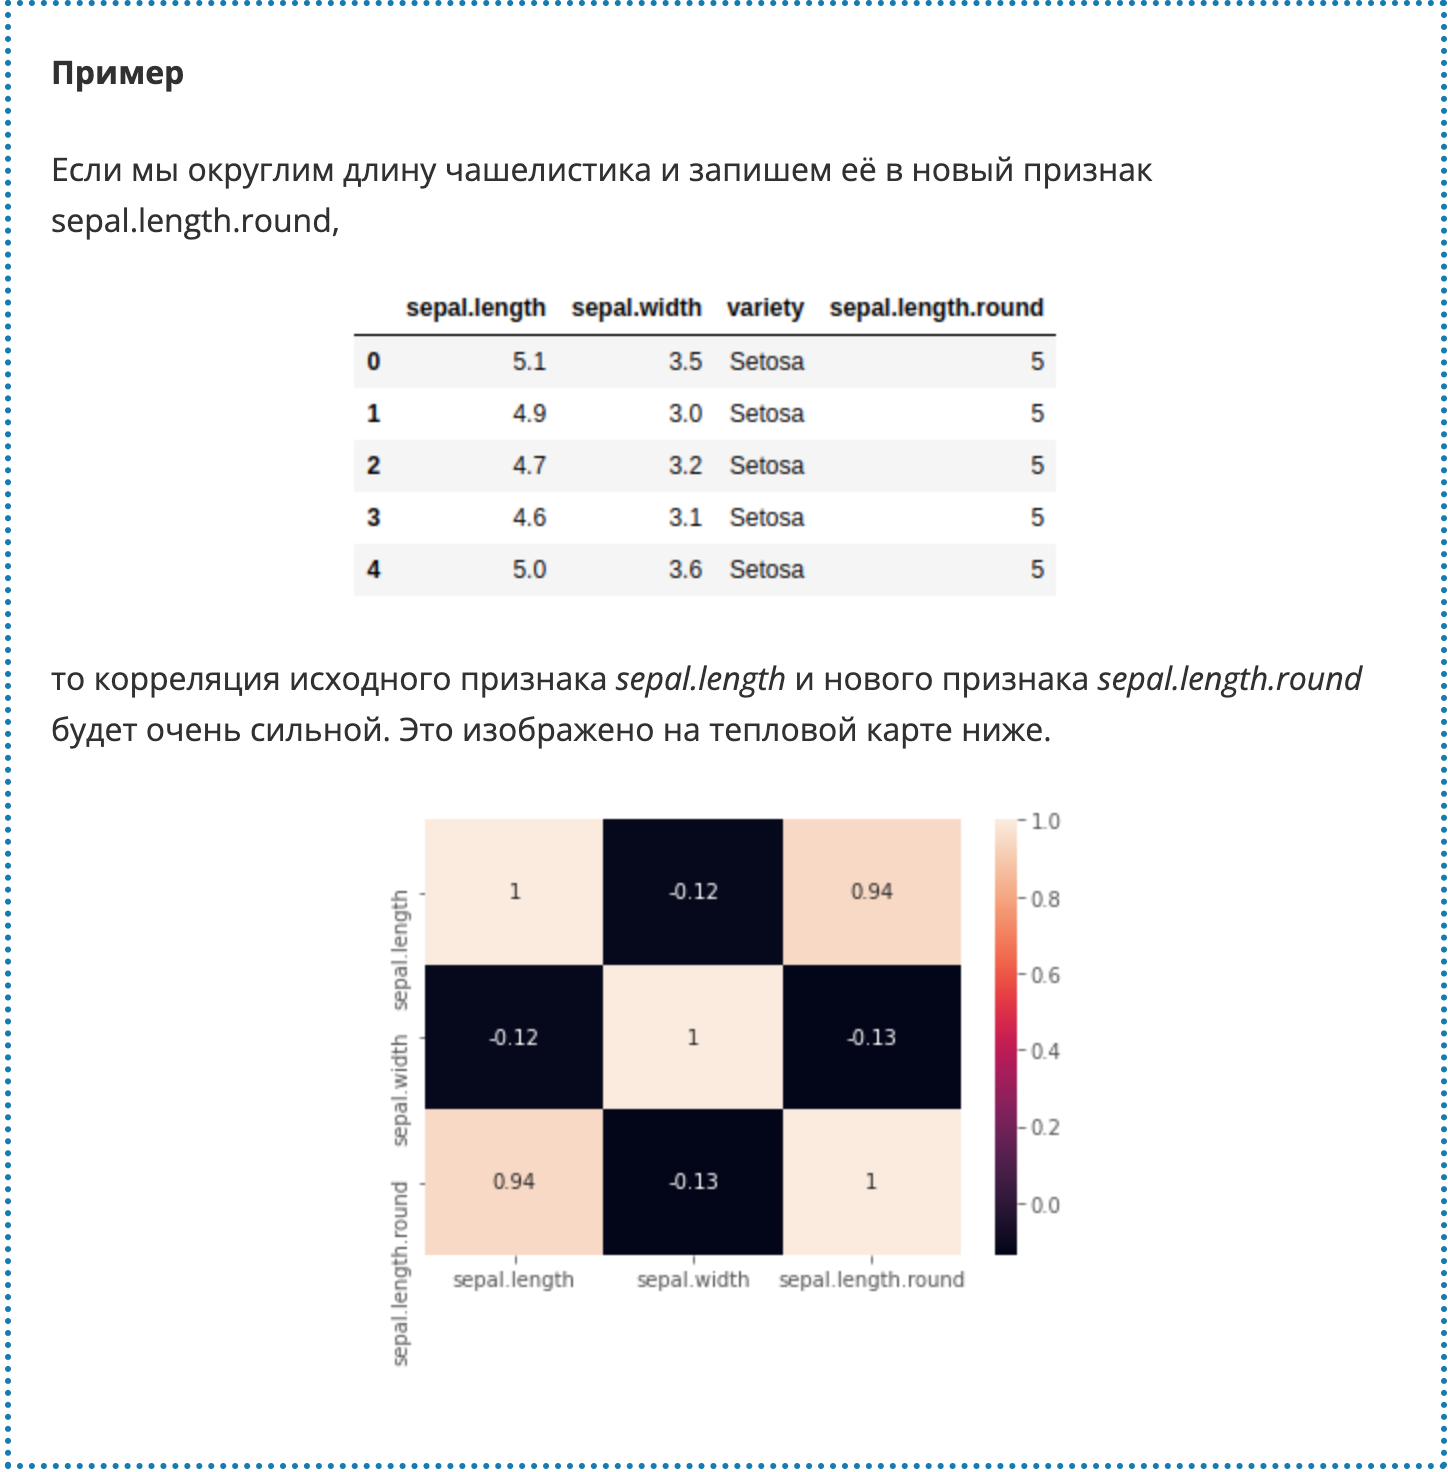

Корреляция между исходным признаком sepal.length и новым признаком sepal.length.round составила 0.94. При отборе признаков один из них необходимо удалить. В этом случае лучше выбрать sepal.length.round, так как с целым числом удобнее работать.

Подобные критерии для удаления вы можете выбирать самостоятельно для удобства работы с признаками.

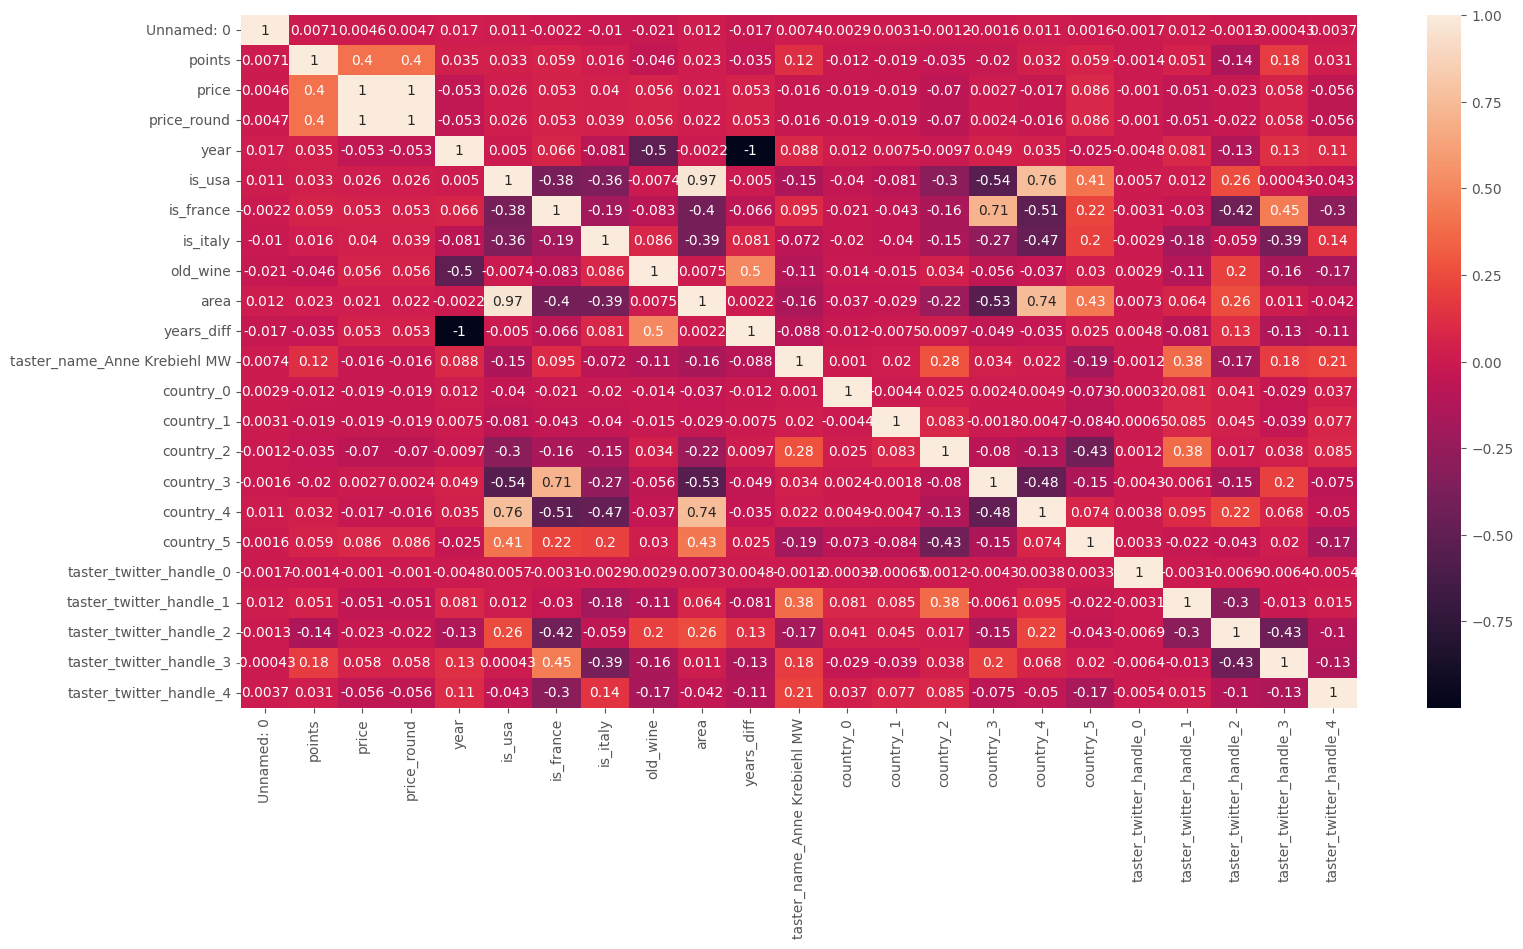

In [76]:
# размер карты
fig, ax = plt.subplots(figsize=(18, 9))
# тепловая карта
sns.heatmap(data.corr(numeric_only=True), annot=True);

Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.
- Удалять признак рейтинг — points нельзя!
- Для простоты вычислений можете использовать только корреляцию Пирсона.

In [78]:
data = data.drop(['price_round', 'is_usa', 'is_france', 'year_diff', 'area'], axis=1)

KeyError: "['year_diff'] not found in axis"

In [79]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'taster_name', 'taster_twitter_handle',
       'title', 'variety', 'winery', 'price_round', 'year', 'is_usa',
       'is_france', 'is_italy', 'old_wine', 'locality', 'population', 'area',
       'years_diff', 'taster_name_Anne Krebiehl MW', 'country_0', 'country_1',
       'country_2', 'country_3', 'country_4', 'country_5',
       'taster_twitter_handle_0', 'taster_twitter_handle_1',
       'taster_twitter_handle_2', 'taster_twitter_handle_3',
       'taster_twitter_handle_4'],
      dtype='object')

В этом юните мы узнали, что такое отбор признаков и мультиколлинеарность, а также научились отбирать признаки путём исключения сильно скоррелированных признаков для дальнейшего построения модели. В следующем юните мы закрепим знания из юнитов проектирования признаков на практической задаче.

***

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект



In [81]:
# Загрузим данные
heart = pd.read_csv('data/heart.zip')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [84]:
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
# В ответ введите результат выполнения кода heart['old'].sum().
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [85]:
heart['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.
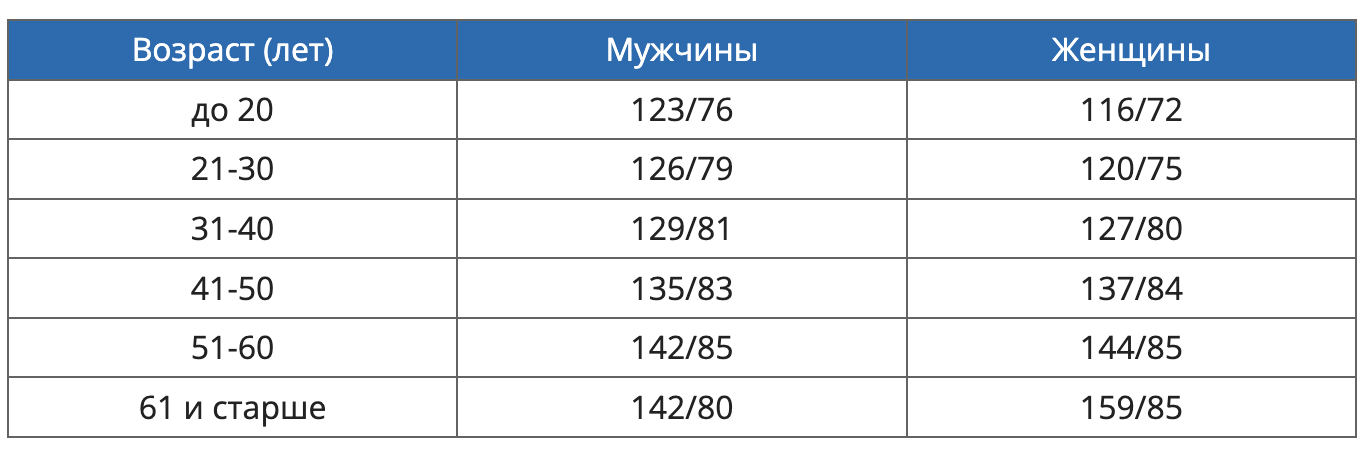

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [87]:
# Создаем словарь со средними значениями давления по возрасту и полу
average_blood_pressure = {
    "Мужчины": {
        "до 20": 123,
        "21-30": 126,
        "31-40": 129,
        "41-50": 135,
        "51-60": 142,
        "61 и старше": 142
    },
    "Женщины": {
        "до 20": 116,
        "21-30": 120,
        "31-40": 127,
        "41-50": 137,
        "51-60": 144,
        "61 и старше": 159
    }
}

# Функция для применения среднего давления по возрасту и полу
def calculate_average_pressure(row):
    age = row['age']
    sex = 'Мужчины' if row['sex'] == 1 else 'Женщины'
    
    if age < 20:
        age_group = 'до 20'
    elif age <= 30:
        age_group = '21-30'
    elif age <= 40:
        age_group = '31-40'
    elif age <= 50:
        age_group = '41-50'
    elif age <= 60:
        age_group = '51-60'
    else:
        age_group = '61 и старше'
    
    return average_blood_pressure[sex][age_group]

# Создаем новый признак trestbps_mean
heart['trestbps_mean'] = heart.apply(calculate_average_pressure, axis=1)
heart['trestbps_mean'][300]

142

In [91]:
# Определим число уникальных категорий в каждом столбце нашей таблицы melb_df.
# Для этого создадим вспомогательную таблицу unique_counts
# Создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in heart.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, heart[col].nunique(),heart[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,sex,2,int64
1,fbs,2,int64
2,exang,2,int64
3,target,2,int64
4,old,2,int64
5,restecg,3,int64
6,slope,3,int64
7,cp,4,int64
8,thal,4,int64
9,ca,5,int64


In [99]:
# Для автоматического отбора, критерии см ниже
result = []
for col in heart.columns:
    if (heart[col].max() > 1) and (heart[col].nunique() < 15) and \
                                            (heart[col] % 1 == 0).all():
        result.append(col)
result

['cp', 'restecg', 'slope', 'ca', 'thal', 'trestbps_mean']

Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

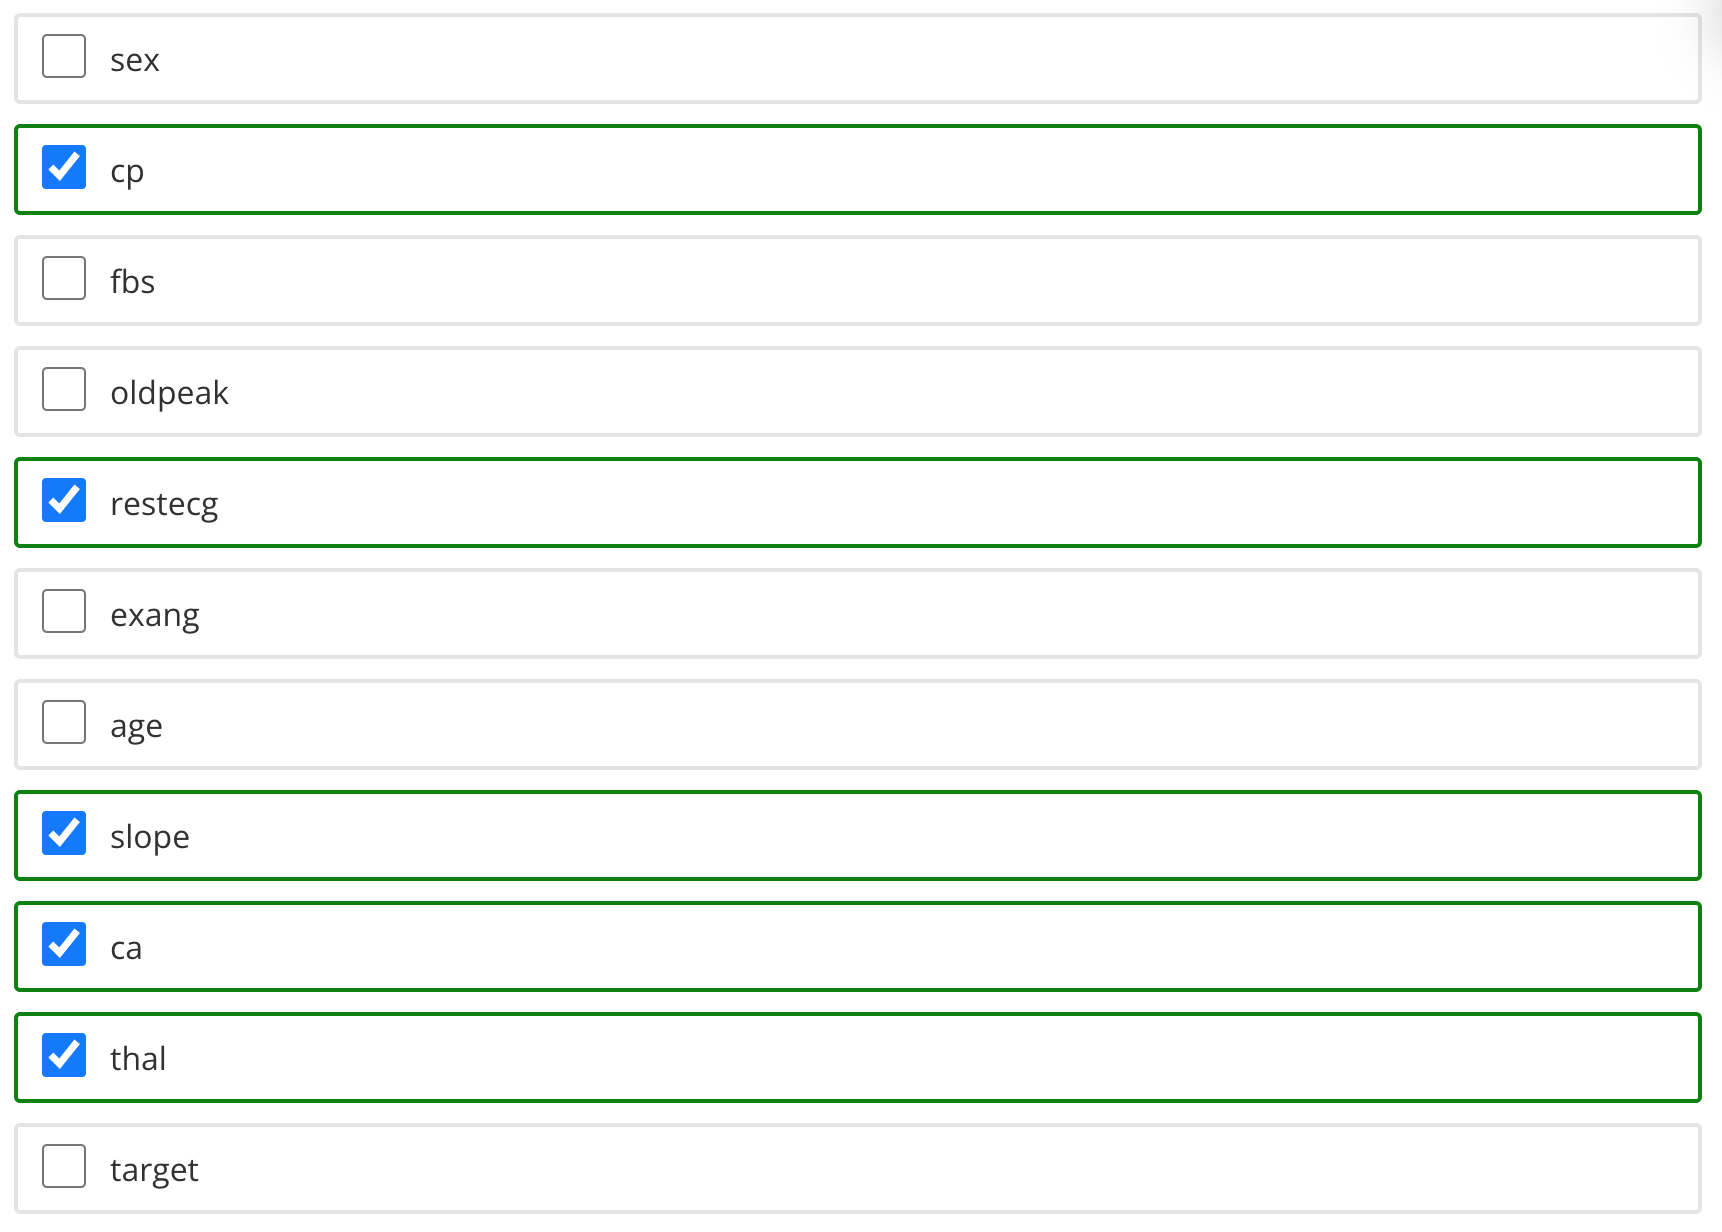

### Как отобрать категориальные признаки для OneHotEncoding?

**Для автоматического отбора можно использовать следующие правила:**

* максимальное значение более 1 (не бинарный признак), 
* чтобы значений в колонке было меньше 15 
* и признак не имеет десятых/сотых долей (дискретность)

Это условие (heart[col] % 1 == 0) проверяет, что остаток от деления всех значений в колонке на 1 равен нулю, что означает отсутствие десятых или сотых долей.   
Использование .all() после (heart[col] % 1 == 0) позволяет проверить, что все элементы в серии (колонке) удовлетворяют условию.

***

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [103]:
# Кодируем через OneHotEncoder 
# указываем столбцы для кодирования
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) 
# кодируем столбцы и получаем отдельный датафрейм
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
# соединяем оригинальный датафрейм и полученный
heart = pd.concat([heart, type_bin], axis=1)
# удаляем исходные столбцы
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
# подсчитываем количество столбцов
len(heart.columns)

30

In [111]:
# Нормализуйте все числовые признаки подходящим способом.
# В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.
# Для необработанных данных следует использовать RobustScaler, так как мы не удаляли выбросы
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r = pd.DataFrame(heart_r, columns=heart.columns)
heart_r['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

In [112]:
# Как автоматически отобрать числовые признаки?
# # берем название колонок с числовыми признаками
columns_num = list(list(heart.dtypes[(heart.dtypes == 'int64') | (heart.dtypes == 'float64')].index))
columns_num

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'target',
 'old',
 'trestbps_mean',
 'cp_1',
 'cp_2',
 'cp_3',
 'cp_4',
 'restecg_1',
 'restecg_2',
 'restecg_3',
 'slope_1',
 'slope_2',
 'slope_3',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'ca_5',
 'thal_1',
 'thal_2',
 'thal_3',
 'thal_4']

In [113]:
# Проведите корреляционный анализ и отберите признаки для будущей модели. 
# Выберите пары сильно скоррелированных признаков.
heart.corr()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,trestbps_mean,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.398522,0.096801,0.210013,-0.225439,0.718028,0.763055,0.047516,-0.059432,-0.147399,0.138253,0.141398,-0.160654,0.084621,0.030536,-0.192580,0.177201,-0.350844,0.226491,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.044020,0.141664,0.096093,-0.280937,-0.144941,-0.472583,0.088043,-0.116588,-0.041249,0.089621,0.036539,-0.011940,-0.107689,0.046183,-0.014356,-0.009157,-0.122854,-0.020571,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.046698,0.067616,0.193216,-0.144931,0.180631,0.236108,0.151343,-0.045107,-0.081851,0.021447,0.133249,-0.146576,0.058635,0.122384,-0.087472,0.025207,-0.055011,0.088386,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.009940,0.067023,0.053952,-0.085239,0.159388,0.284474,-0.050589,-0.037918,-0.012750,0.070684,0.166565,-0.174394,0.034615,-0.045340,-0.028054,0.051177,-0.080600,0.059887,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.008567,0.025665,0.005747,-0.028046,0.026790,0.071056,0.055511,0.083679,-0.060649,-0.060190,0.077405,-0.066344,-0.048305,0.105284,-0.020255,-0.033360,-0.112548,0.122080,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,-0.344187,0.421741,-0.271898,-0.247197,0.079082,0.165475,0.248317,-0.376561,-0.073953,0.101512,-0.120870,-0.056590,0.448043,-0.419627,0.273136,-0.056905,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.378812,1.000000,0.288223,-0.436757,0.019043,0.004429,-0.093384,-0.271028,-0.233863,0.469061,0.084059,-0.093776,0.042729,0.059253,-0.287606,0.257687,-0.187734,0.097399,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.344187,0.288223,1.000000,-0.430696,0.159997,0.125405,0.086959,-0.132444,-0.277513,0.280243,0.100141,-0.138486,0.168172,0.394253,-0.511356,0.310986,-0.204803,0.218319,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946
target,-0.225439,-0.280937,-0.144931,-0.085239,-0.028046,0.421741,-0.436757,-0.430696,1.000000,-0.121056,-0.030830,0.086957,0.316742,0.245879,-0.516015,-0.159775,0.175322,-0.068410,-0.063554,0.394066,-0.362053,0.465590,-0.273998,-0.232412,-0.210615,0.066441,-0.106589,0.527334,-0.486112,-0.007293
old,0.718028,-0.144941,0.180631,0.159388,0.026790,-0.271898,0.019043,0.159997,-0.121056,1.000000,0.611538,0.056860,-0.027967,-0.122245,0.086076,0.070292,-0.069616,-0.002826,0.015532,-0.135926,0.128139,-0.222607,0.160985,0.055906,0.175160,-0.076925,0.009761,-0.004237,0.007644,-0.048408


In [117]:
cor_list = [['age', 'old'], ['age', 'trestbps_mean'], ['slope_1', 'slope_3'],
            ['thal_1', 'thal_2'], ['thal_3', 'thal_4'], ['cp_1', 'ca_1'],
            ['cp_1', 'cp_2'], ['thal_2', 'thal_3'], ['restecg_1', 'restecg_2'],
            ['slope_2', 'slope_3'], ['age', 'exang'], ['age', 'chol']]

cor_list_end = []
for elem in cor_list:
    cor_list_end.append(
        (elem, round(heart.corr()[elem[0]][elem[1]], 2)) # numeric_only=True  добавить при свежих версиях Pandas
    )
[i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)]

[(['age', 'old'], 0.72),
 (['age', 'trestbps_mean'], 0.76),
 (['thal_2', 'thal_3'], -0.87),
 (['restecg_1', 'restecg_2'], -0.97),
 (['slope_2', 'slope_3'], -0.87)]

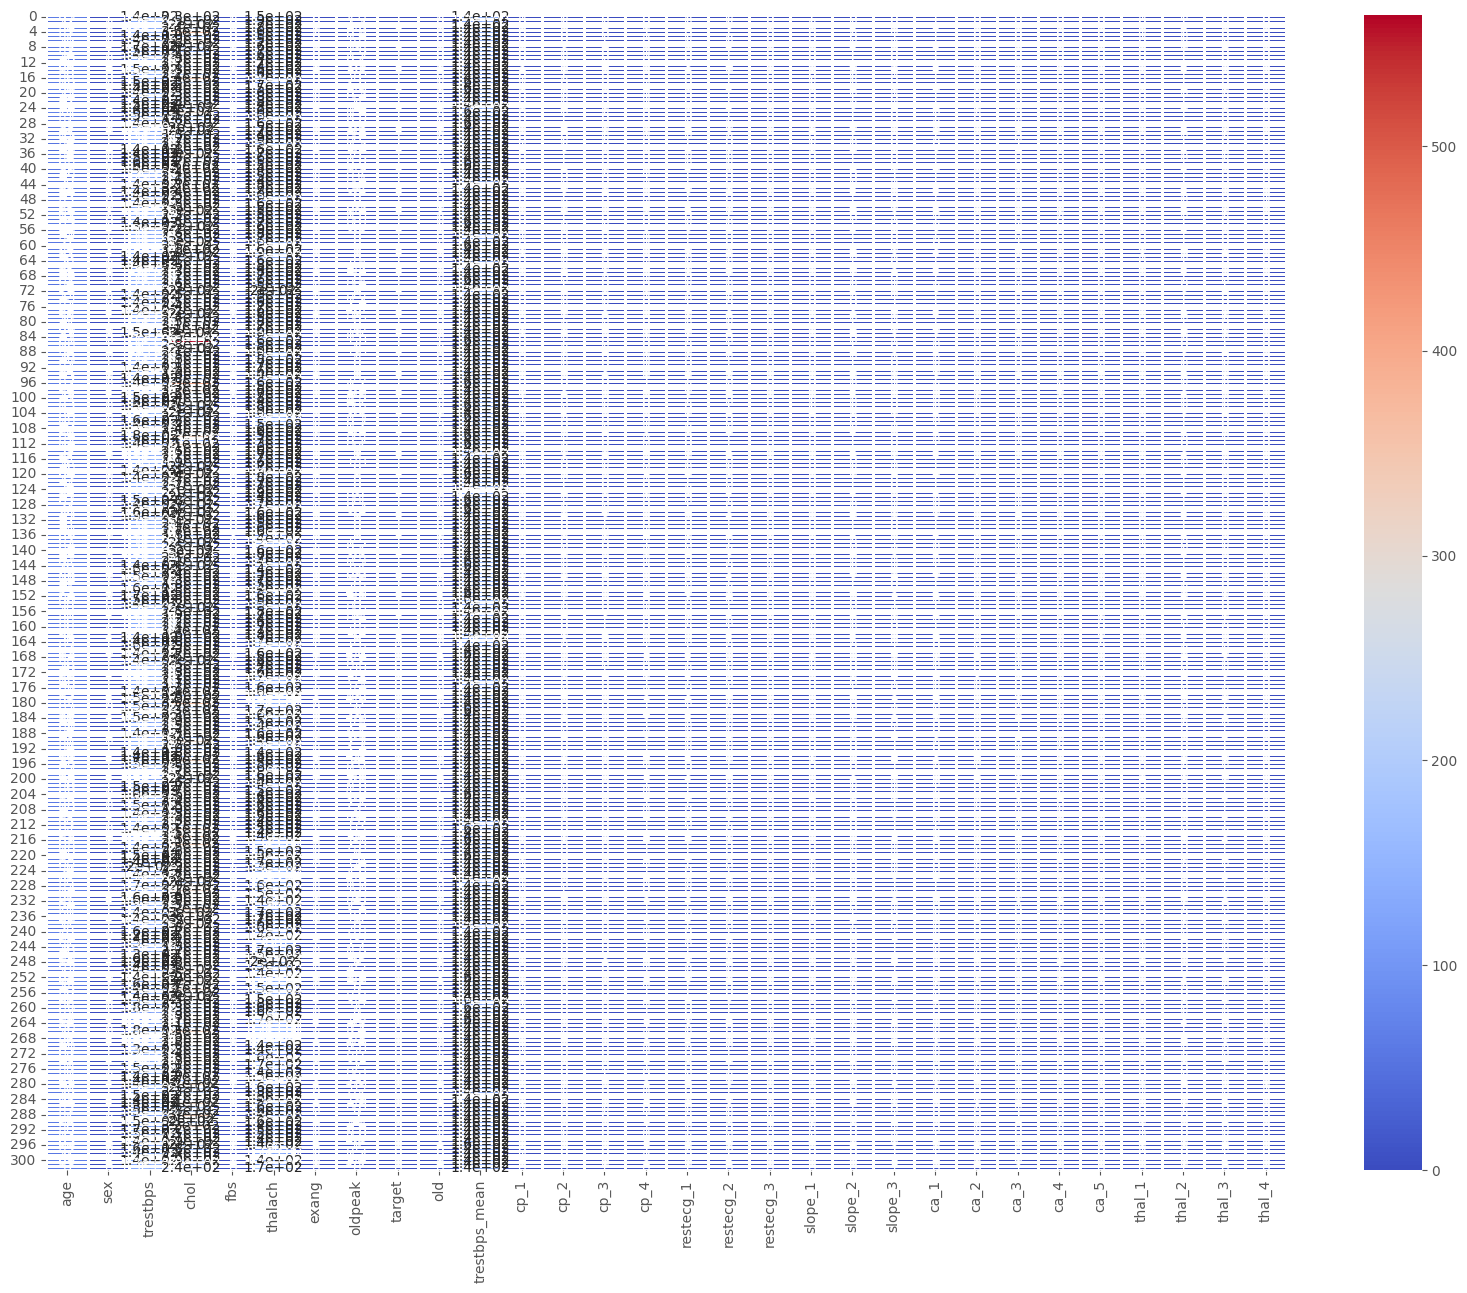

In [115]:
# с картой не фортануло
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(heart, annot=True, linewidths=.9, cmap='coolwarm');

# ПОЗДРАВЛЯЕМ!

В этом модуле, посвящённом проектированию признаков, мы:

УЗНАЛИ:
- что такое проектирование признаков и его этапы;
- что такое внешние источники данных;
- основы кодирования признаков и его методы;
- основы преобразования признаков и его методы;
- основы отбора признаков.

НАУЧИЛИСЬ:
- создавать новые признаки;
- использовать внешние источники данных для проектирования признаков;
- кодировать и преобразовывать признаки;
- делать отбор не скоррелированных признаков.